# ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## SAMPLE DATASETS

In [2]:
#Read the data
en_df = pd.read_parquet('../data/sample/sample_en_parquet/', engine='pyarrow')
fr_df = pd.read_parquet('../data/sample/sample_fr_parquet/', engine='pyarrow')

#Parse the date column to datetime
en_df['created_at'] = pd.to_datetime(en_df['created_at'])
fr_df['created_at'] = pd.to_datetime(fr_df['created_at'])

display(en_df.head())
display(fr_df.head())

,id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count
0,1633111775397699585,1421990603278061569,2023-03-07 14:26:03+00:00,4644,0,0,0,0,11
1,1633111775406071808,1266246492529913856,2023-03-07 14:26:03+00:00,245,0,0,0,0,102
2,1633111775389310976,1516399872173383680,2023-03-07 14:26:03+00:00,121,0,0,0,0,67
3,1633111775397683207,1587894925420544002,2023-03-07 14:26:03+00:00,0,0,0,0,0,0
4,1633111775380996096,535586776,2023-03-07 14:26:03+00:00,413,0,0,0,0,418


,id,author_id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count
0,1633111775393509381,1305923782608138243,2023-03-07 14:26:03+00:00,0,0,0,0,0,40
1,1633111783773700108,1375800129857404932,2023-03-07 14:26:05+00:00,0,0,0,0,0,183
2,1633111783769513990,706072306523705344,2023-03-07 14:26:05+00:00,0,0,0,0,0,555
3,1633111783777923072,1174722596023259137,2023-03-07 14:26:05+00:00,0,0,0,0,0,1616
4,1633111792191778817,1601082532723826688,2023-03-07 14:26:07+00:00,46,0,0,0,0,76


In [3]:
def plot_tweet_features_sample(df):
    """
    Plot the number of retweets, likes, replies and quotes as a function of the number of followers

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the tweets
    
    Returns
    -------
    None
    """
    # Plot the number of retweets, likes, replies and quotes as a function of the number of followers
    fig, ax = plt.subplots(2,2, figsize=(15,10))
    columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count']
    en_df_sorted = df.sort_values(by='followers_count')

    for i,col in enumerate(columns):
        coords = (i % 2, i // 2)
        ax[coords].scatter(df['followers_count'], df[col], alpha=0.5, color='blue')
        ax[coords].set_xlabel('Followers') # x-axis label
        ax[coords].set_ylabel(col.replace('_', ' ').title()) # y-axis label
        ax[coords].set_yscale('log') # y-axis in log scale
        ax[coords].set_xscale('log') # x-axis in log scale

### ENGLISH SAMPLE DATASET

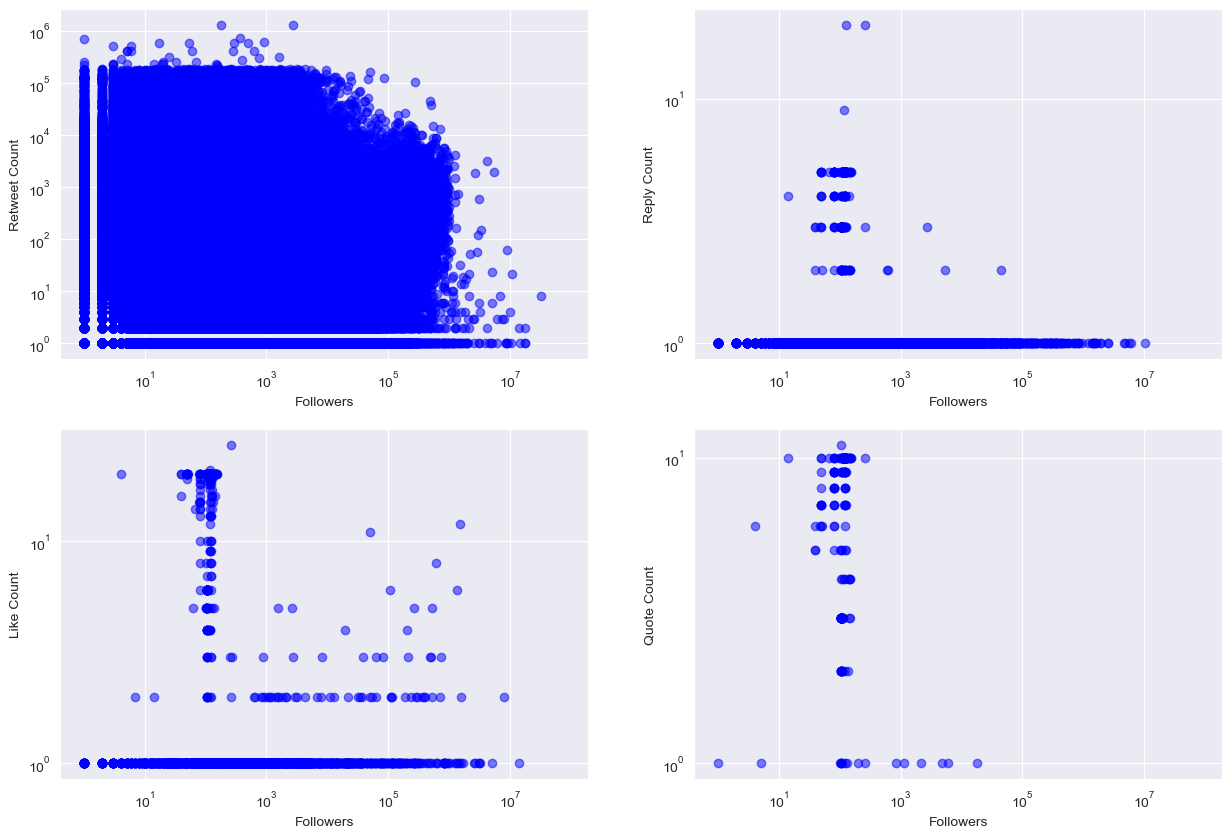

In [4]:
# Plot the number of retweets, likes, replies and quotes as a function of the number of followers for the English tweets sample
plot_tweet_features_sample(en_df)

### FRENCH SAMPLE DATASET

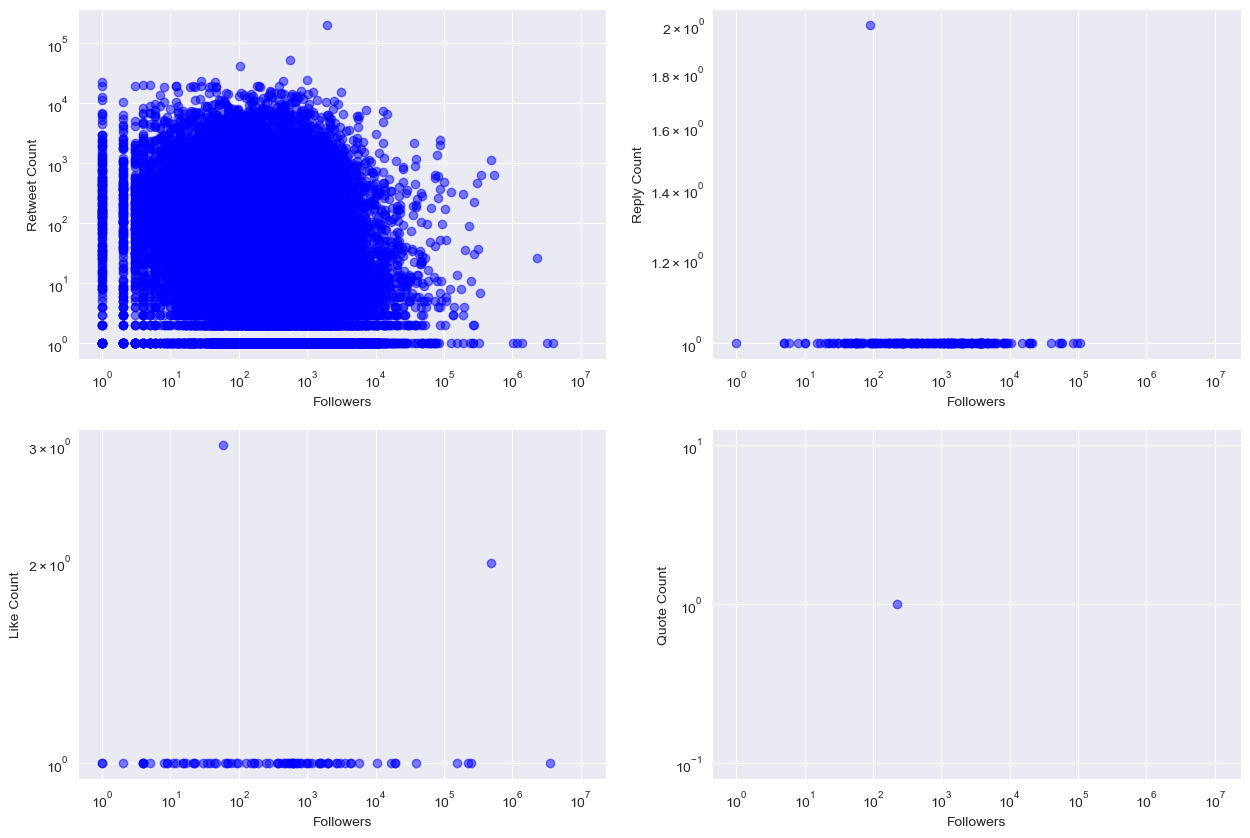

In [5]:
# Plot the number of retweets, likes, replies and quotes as a function of the number of followers for the French tweets sample
plot_tweet_features_sample(fr_df)

## POLITICIANS

In [6]:
def jointplot_tweet_features(df, x_feature_string, columns):
    # Jointplot of the number of retweets, likes, replies and quotes as a function of the number of followers
    for i, col in enumerate(columns):
        sns.jointplot(x=x_feature_string, y=col, data=df, kind="reg", color="royalblue", height=5)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Followers')
        plt.ylabel(col.replace('_', ' ').title())
        plt.show()

### AMERICAN POLITICIANS DATASET

In [7]:
# Load the data
american_politicians_df = pd.read_parquet('../data/american_politicians/parquet/', engine='pyarrow')
# Parse the date column to datetime
american_politicians_df['created_at'] = pd.to_datetime(american_politicians_df['created_at'])
display(american_politicians_df.head())

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
1,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
2,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
3,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
4,914815520842616834,1629304017087090689,2023-02-25 02:15:23+00:00,4,22,165,0,17557,97107,2211,6854,504


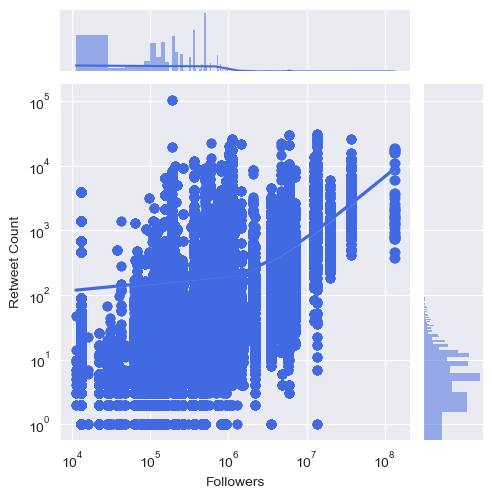

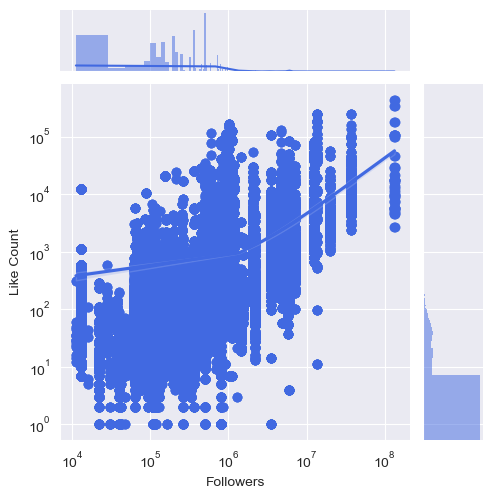

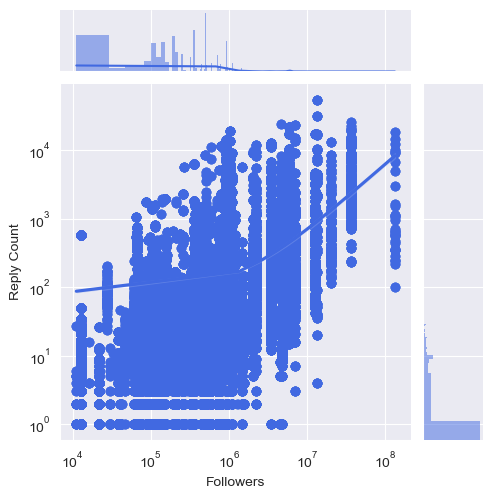

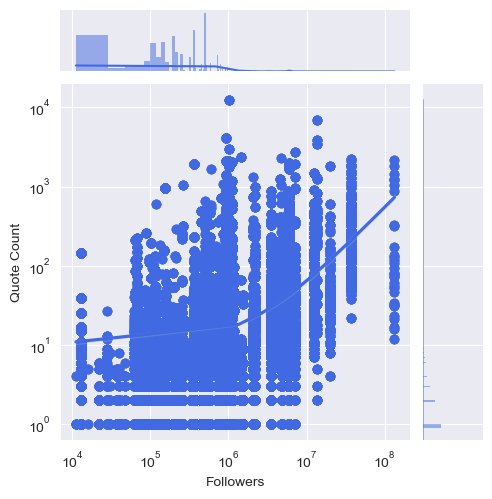

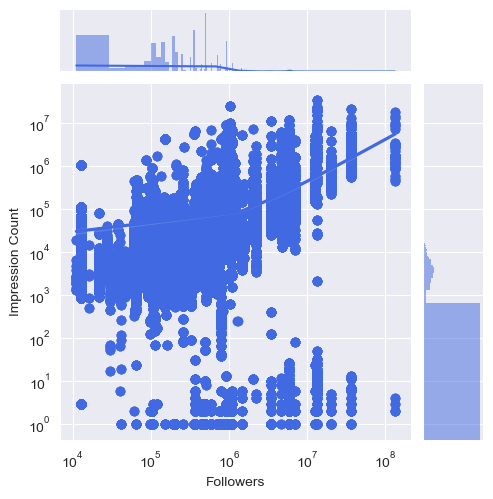

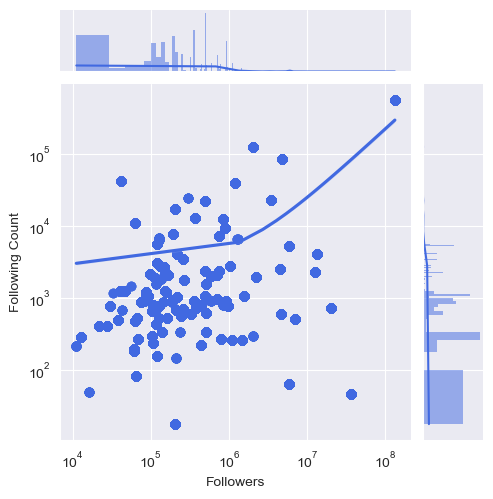

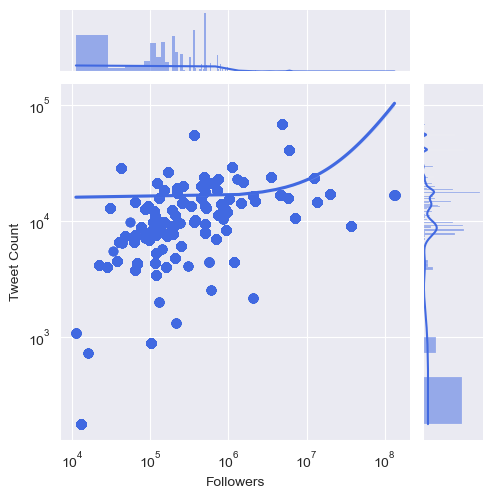

In [8]:
columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count', 'impression_count', 'following_count', 'tweet_count']

# Jointplot of the number of retweets, likes, replies and quotes as a function of the number of followers
jointplot_tweet_features(american_politicians_df, "followers_count", columns)

### FRENCH POLITICIANS DATASET

In [9]:
# Load the data
french_politicians_df = pd.read_parquet('../data/french_politicians/parquet/', engine='pyarrow')
# Parse the date column to datetime
french_politicians_df['created_at'] = pd.to_datetime(french_politicians_df['created_at'])
display(french_politicians_df.head())

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,1283219047,1624482297004138501,2023-02-11 18:55:35+00:00,0,0,0,0,106,143,515,1261,31
1,1283219047,1623725625021239296,2023-02-09 16:48:51+00:00,5015,0,0,0,0,143,515,1261,31
2,1495645262,1632646496708358144,2023-03-06 07:37:12+00:00,0,0,0,0,2,19,146,735,1
3,1495645262,1624819872759701507,2023-02-12 17:17:00+00:00,0,0,0,0,18,19,146,735,1
4,1495645262,1618699131110957058,2023-01-26 19:55:21+00:00,0,0,0,0,21,19,146,735,1


In [10]:
columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count', 'impression_count', 'following_count', 'tweet_count']

# Jointplot of the number of retweets, likes, replies and quotes as a function of the number of followers
# WAY TOO SLOW - IMPOSSIBLE TO GET A VIZ !
# jointplot_tweet_features(french_politicians_df, "followers_count", columns)

## CELEBRITIES

### AMERICAN CELEBRITIES DATASET

In [11]:
# Load the data
american_celebrities_df = pd.read_parquet('../data/american_celebrities/parquet/', engine='pyarrow')
# Parse the date column to datetime
american_celebrities_df['created_at'] = pd.to_datetime(american_celebrities_df['created_at'])
display(american_celebrities_df.head())

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,26053643,1643403150509092869,2023-04-05 00:00:18+00:00,16,53,113,0,157120,11663294,873,8086,23037
1,26053643,1643327817588051968,2023-04-04 19:00:57+00:00,5951,2439,58879,352,2822923,11663294,873,8086,23037
2,26053643,1642184616730849286,2023-04-01 15:18:17+00:00,168,202,3190,21,329538,11663294,873,8086,23037
3,26053643,1641652707818901504,2023-03-31 04:04:40+00:00,236,248,2361,25,221662,11663294,873,8086,23037
4,26053643,1641558313073786880,2023-03-30 21:49:35+00:00,2355,1828,29215,149,1386875,11663294,873,8086,23037


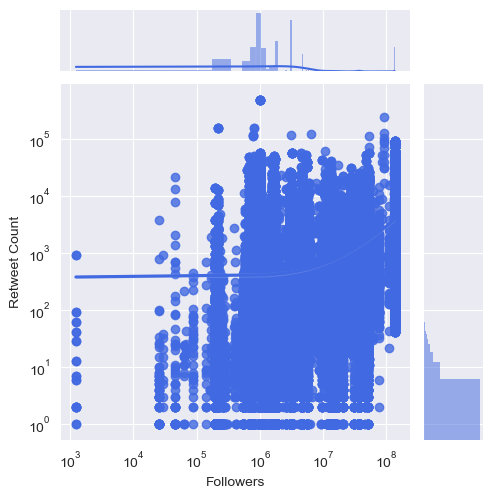

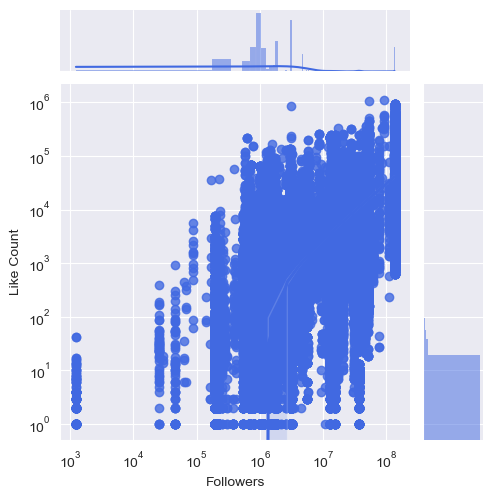

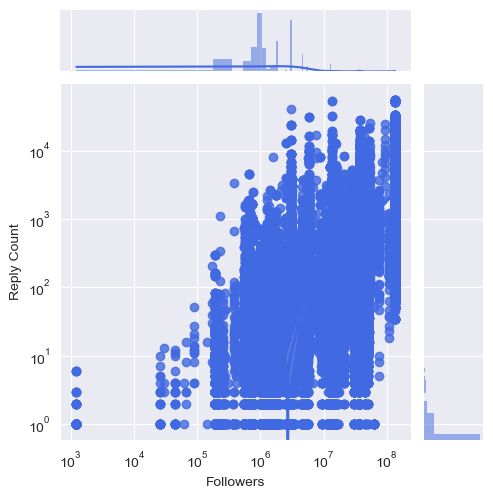

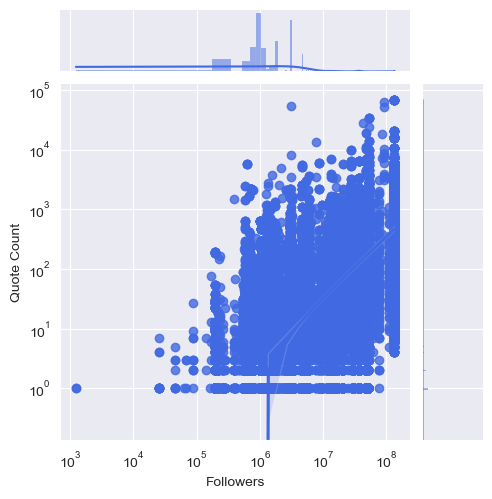

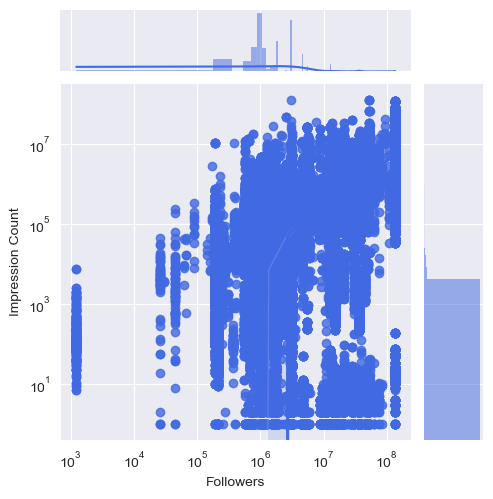

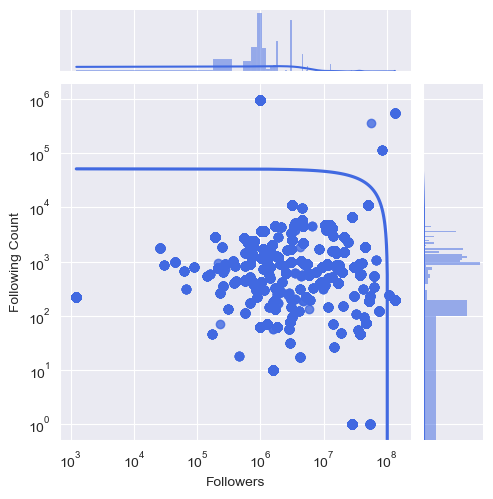

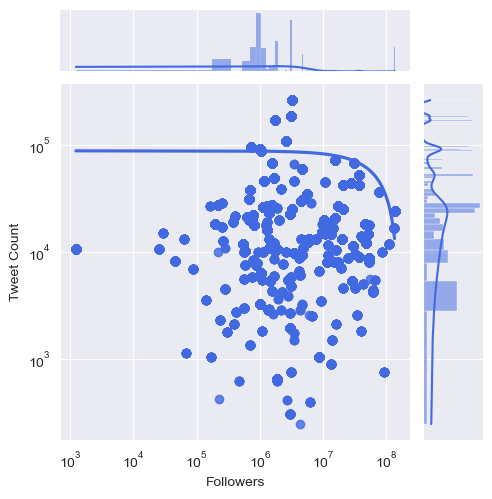

In [12]:
columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count', 'impression_count', 'following_count', 'tweet_count']

# Jointplot of the number of retweets, likes, replies and quotes as a function of the number of followers
jointplot_tweet_features(american_celebrities_df, "followers_count", columns)

### FRENCH CELEBRITIES DATASET

In [13]:
# Load the data
french_celebrities_df = pd.read_parquet('../data/french_celebrities/parquet/', engine='pyarrow')
# Parse the date column to datetime
french_celebrities_df['created_at'] = pd.to_datetime(french_celebrities_df['created_at'])
display(french_celebrities_df.head())

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,108928379,1645383444652867585,2023-04-10 11:09:17+00:00,0,0,1,0,9,92244,2130,25141,601
1,108928379,1645383444652867585,2023-04-10 11:09:17+00:00,0,0,1,0,9,92244,2130,25141,601
2,108928379,1645383444652867585,2023-04-10 11:09:17+00:00,0,0,1,0,9,92244,2130,25141,601
3,108928379,1645383444652867585,2023-04-10 11:09:17+00:00,0,0,1,0,9,92244,2130,25141,601
4,108928379,1645383444652867585,2023-04-10 11:09:17+00:00,0,0,1,0,9,92244,2130,25141,601


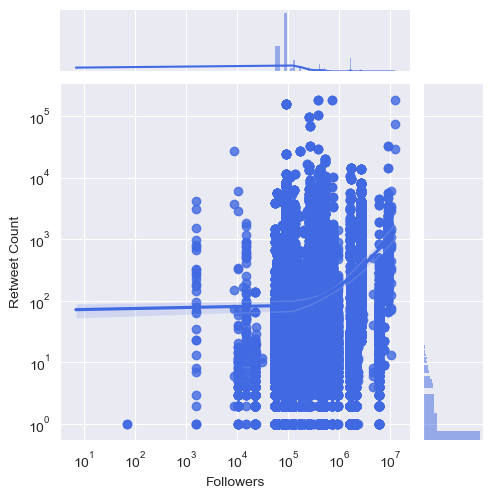

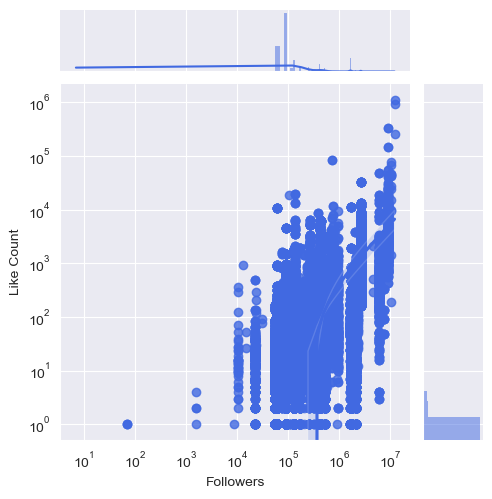

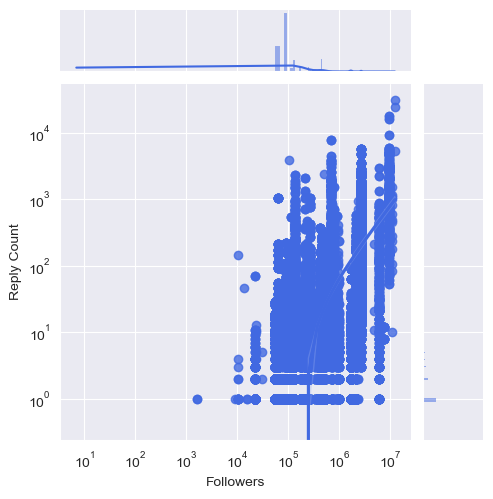

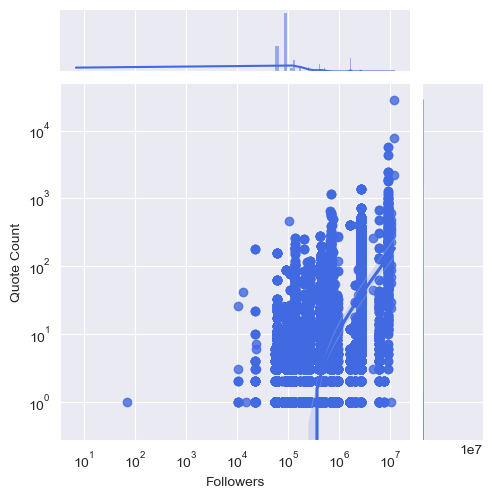

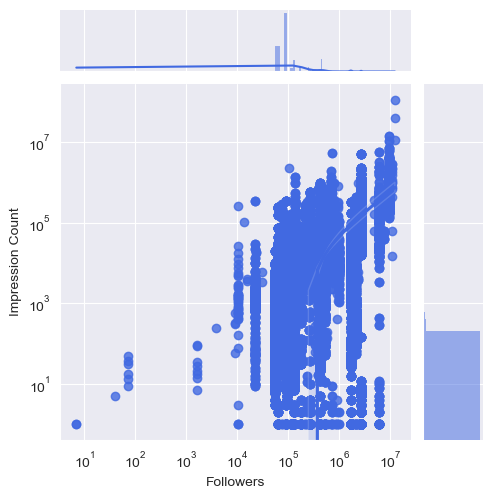

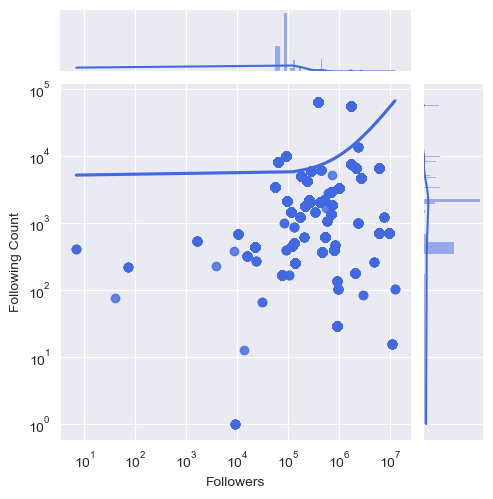

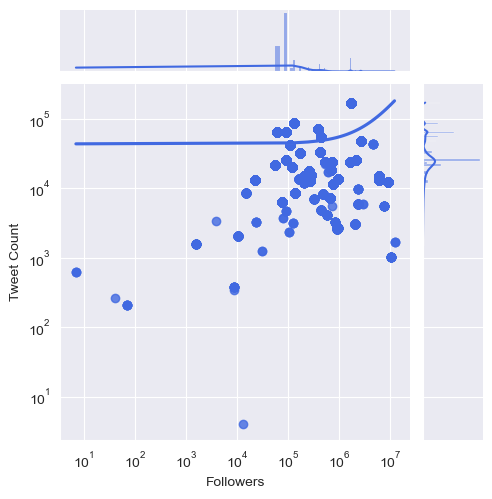

In [14]:
columns = ['retweet_count', 'like_count', 'reply_count', 'quote_count', 'impression_count', 'following_count', 'tweet_count']

# Jointplot of the number of retweets, likes, replies and quotes as a function of the number of followers
jointplot_tweet_features(french_celebrities_df, "followers_count", columns)

In [15]:
len(french_celebrities_df)

144026